# Title
# Sepsis Prediction Model
## Business Understanding 
Sepsis is a disease that can affect people of all ages, but it is more common and potentially more severe in older adults, young children, and individuals with weakened immune systems or chronic health conditions. This project is aimed to build a robustic model that will help medical practitioners for early recognition of sepsis in a patient for prompt treatment

## Hypothesis
<b> Null Hypothesis(Ho):</b> There is correlation between body mass index (BMI) and the incidence of sepsis among patients

<b>Alternative Hypothesis(H1)</b>: There is no correlation between body mass index (BMI) and the incidence of sepsis among patients

<b> Null Hypothesis(Ho):</b> Individuals with higher BMI levels are more likely to develop sepsis compared to those with lower BMI levels?

<b>Alternative Hypothesis(H1)</b>: Individuals with higher BMI levels are not likely to develop sepsis compared to those with lower BMI levels?

### Business Questios 
1. Are individuals with higher BMI levels more likely to develop sepsis compared to those with lower BMI levels?
2. Which age rate have high risk of sepsis
3. What is the pesentage of patients with sepsis and those with out
4. What is the average plasma glucose level of patients who develop sepsis and those who do not
5. there are differences on Distribution of blood work among patients with sepsis and those with out
6. How many patients have insurance cover?



### Columns Description
D: number to represent patient ID

PRG: Plasma glucose

PL: Blood Work Result-1 (mu U/ml)

PR: Blood Pressure (mm Hg)

SK: Blood Work Result-2 (mm)

TS: Blood Work Result-3 (mu U/ml)

M11: Body mass index (weight in kg/(height in m)^2

BD2: Blood Work Result-4 (mu U/ml)

Age: patients age (years)

Insurance: If a patient holds a valid insurance card

Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import skew
from scipy.stats import ttest_ind
import scipy.stats as stats
# Machine learning Packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import RandomOverSampler, SMOTE 
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection  import SelectKBest
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest,mutual_info_classif

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve, auc
from sklearn.model_selection import GridSearchCV

from imblearn.pipeline import Pipeline as imbpipeline

from sklearn import set_config
import joblib
import os
# Ignore warnings (optional)
import warnings
warnings.filterwarnings("ignore")

## Loading of the data 

In [2]:
train_df = pd.read_csv('Paitients_Files_Train.csv')
train_df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


## Performing EXproratory Data Anlysis (EDA)

In [38]:
#  checking for the data information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [39]:
# checking for missing values
train_df.isnull().any().any()

False

In [40]:
#  check for duplicates
train_df.duplicated().sum()

0

In [41]:
# undternding the statistics of the data
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [42]:
train_df.columns

Index(['ID', 'PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')

## Bivariet Analysis

<Figure size 1500x1000 with 0 Axes>

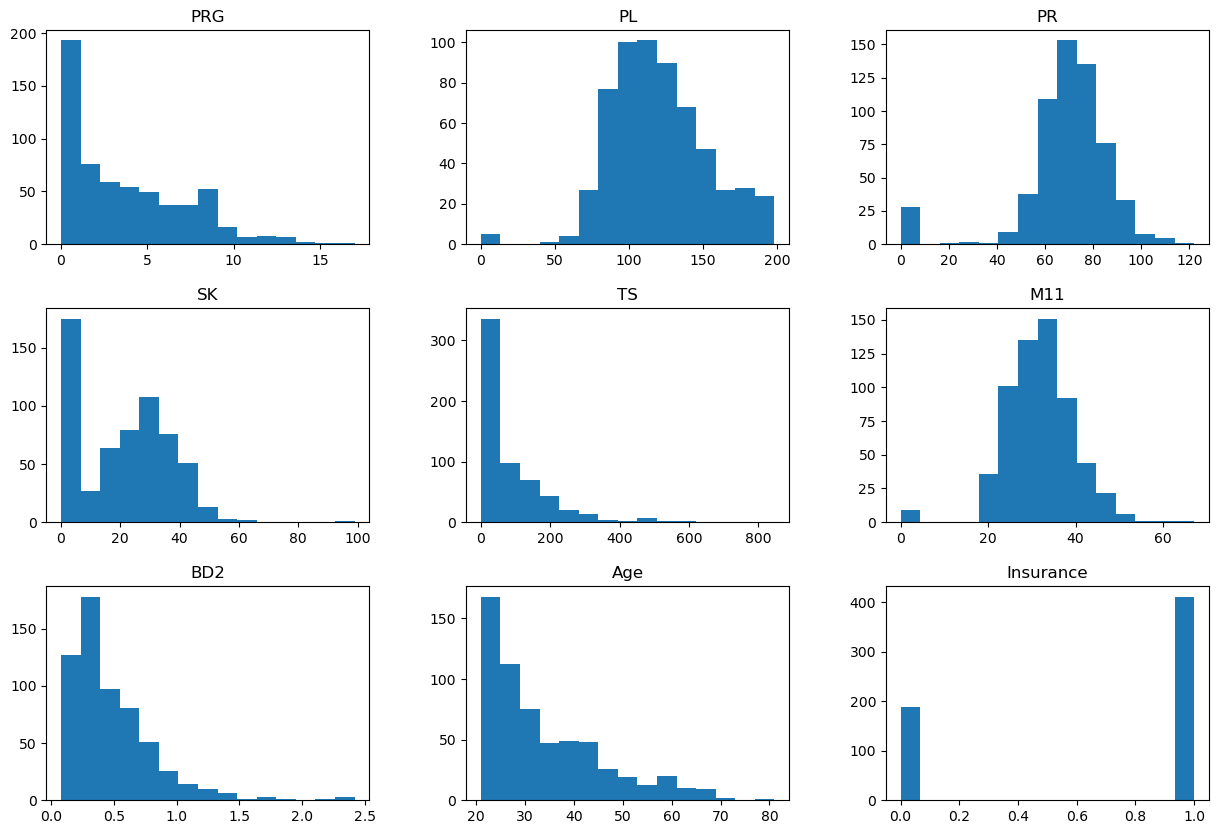

In [43]:
plt.figure(figsize=(15,10))
train_df.hist(figsize=(15,10), grid=False, bins=15)
plt.show()

In [44]:
corr = train_df.corr()

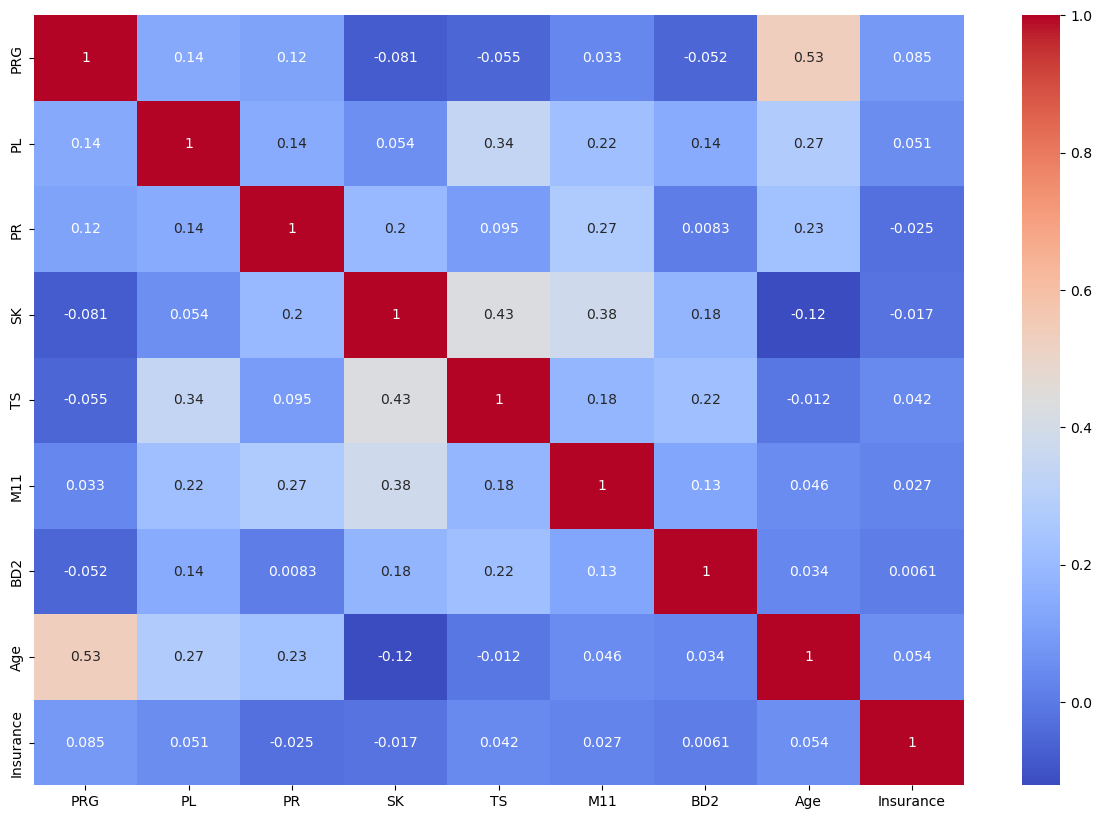

In [45]:
plt.figure(figsize=(15,10))
sn.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [3]:
blood_box = train_df.drop(['PRG', 'PL', 'PR', 'SK', 'TS','BD2'],axis=1)

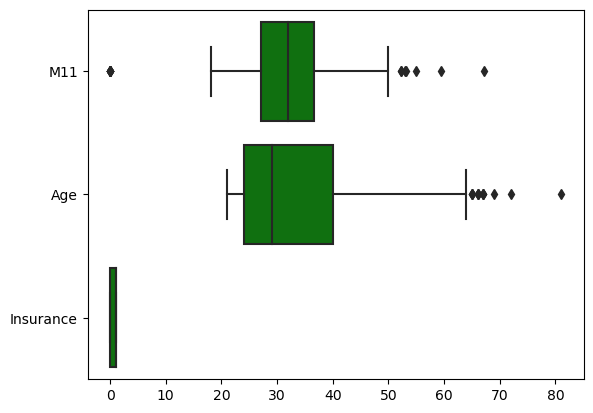

In [4]:
sn.boxplot(data=blood_box, color='green', orient='h')
plt.show()

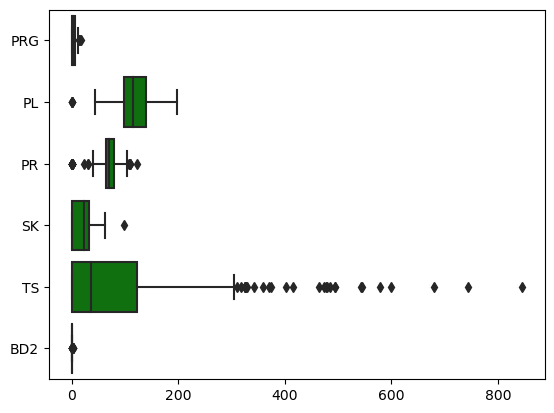

In [11]:
others =train_df.drop(['M11', 'Age', 'Insurance','Sepssis'],axis=1)
sn.boxplot(data=others, color='green', orient='h')
plt.show()

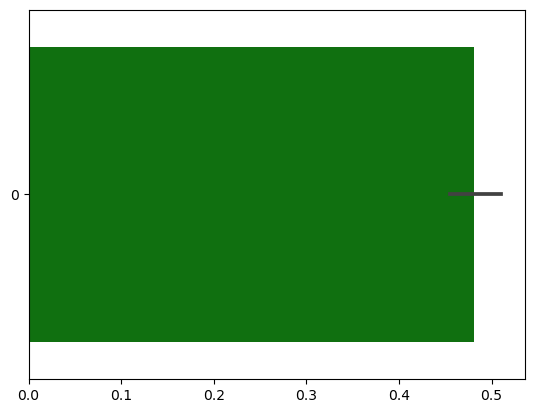

In [12]:
BD2=train_df['BD2']
sn.barplot(data=BD2, color='green', orient='h')
plt.show()

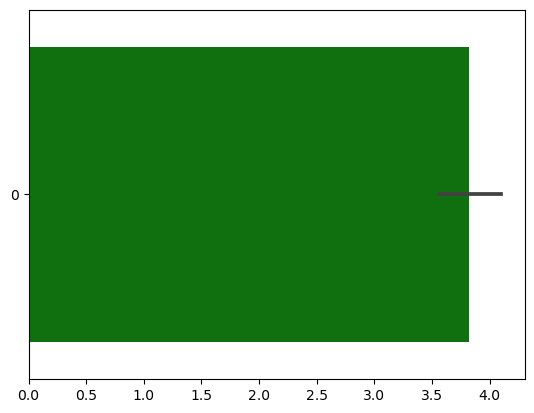

In [12]:
PRG = train_df['PRG']
sn.barplot(data=PRG, color='green', orient='h')
plt.show()

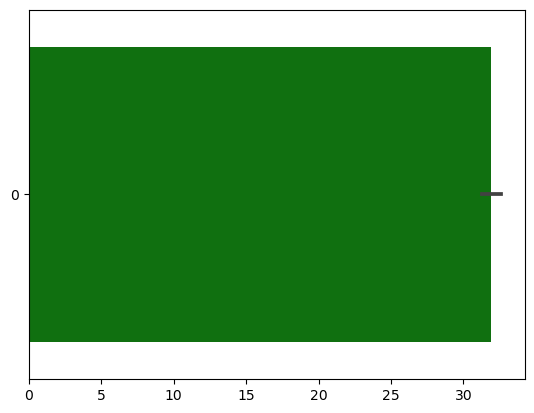

In [13]:
M11=train_df['M11']
sn.barplot(data=M11, color='green', orient='h')
plt.show()

### Multivariet

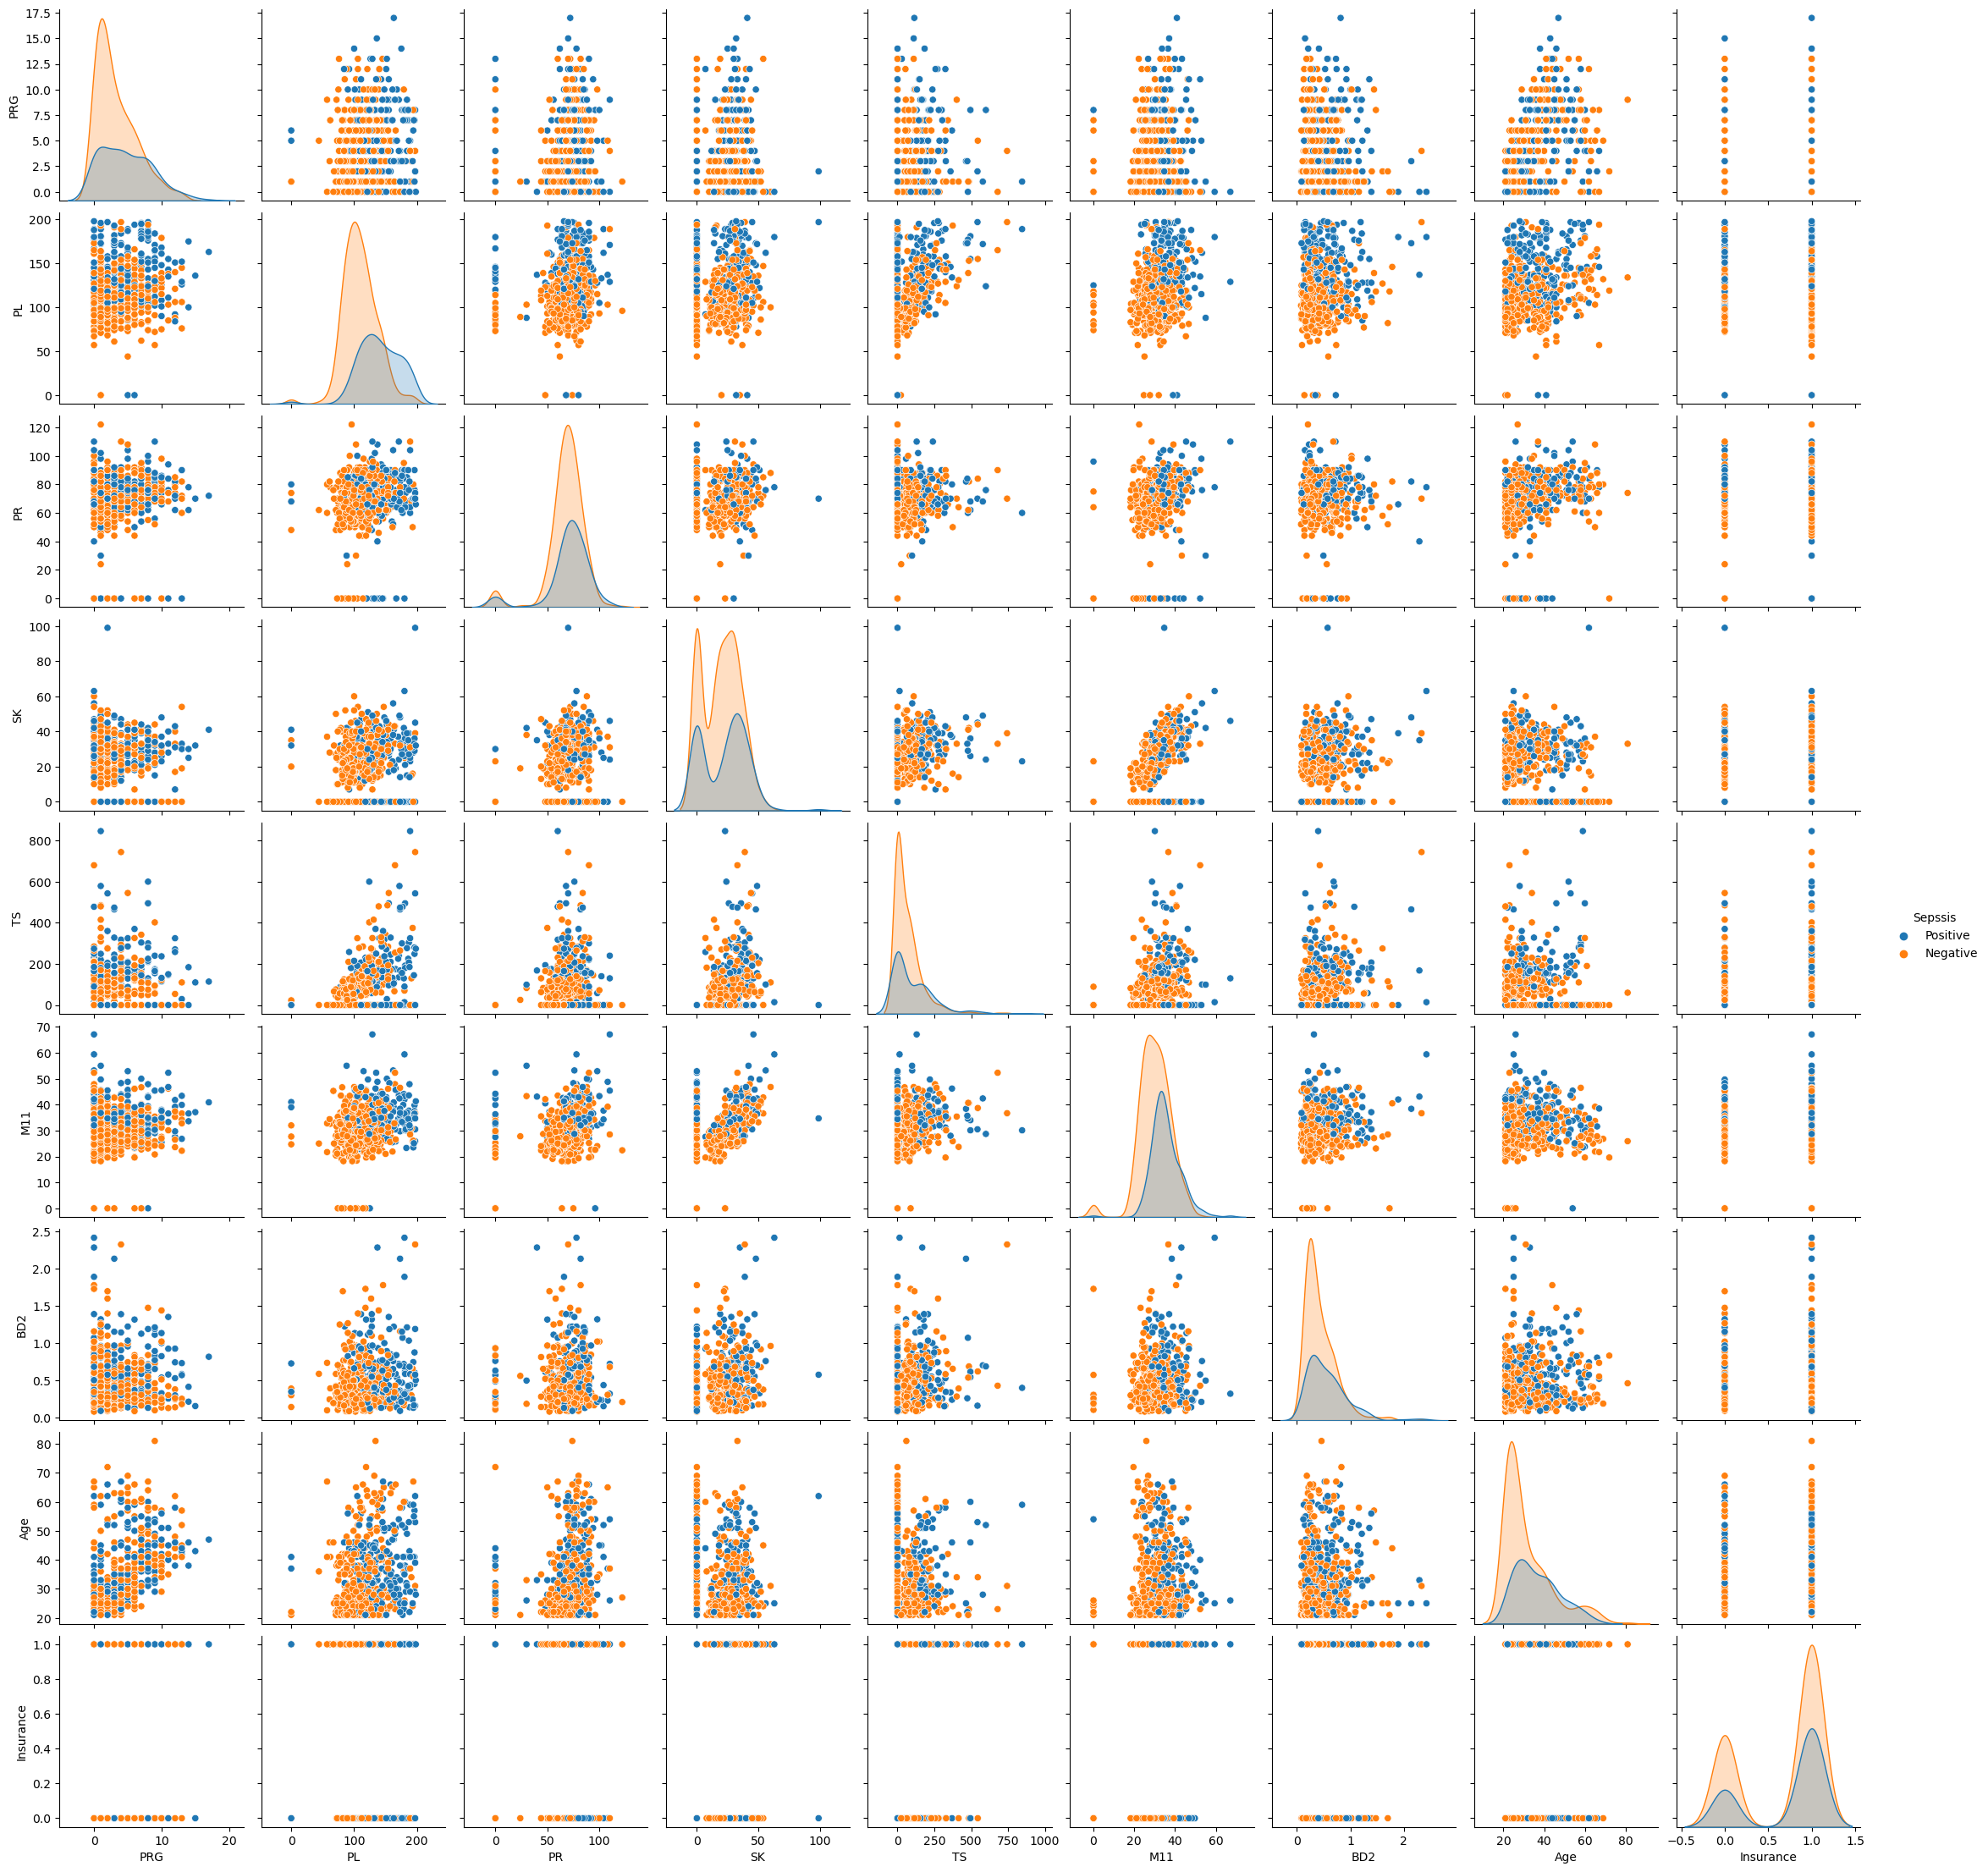

In [4]:
sn.pairplot(data=train_df, hue= 'Sepssis')
plt.show()

## Hypothesis testing

## Answering Analytical Questions

1. Are individuals with higher BMI levels more likely to develop sepsis compared to those with lower BMI levels?
2. Which age rate have high risk of sepsis
3. What is the pesentage of patients with sepsis and those with out
4. What is the average plasma glucose level of patients who develop sepsis and those who do not
5. there are differences on Distribution of blood work among patients with sepsis and those with out
6. How many patients have insurance cover?

1. Are individuals with higher BMI levels more likely to develop sepsis compared to those with lower BMI levels?

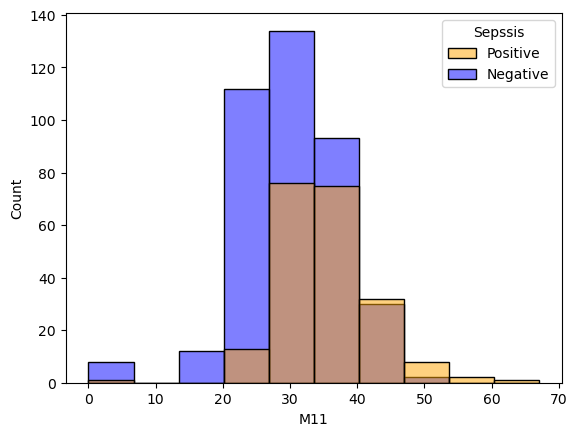

In [29]:

sn.histplot(data=train_df, x='M11', hue='Sepssis',palette=['orange', 'blue'], bins=10)
plt.show()



4. What is the average plasma glucose level of patients who develop sepsis and those who do not

In [33]:
total_sepssis = len(train_df)

# Extract the relevant variables 
positive_prg = train_df[train_df['Sepssis'] == 'Positive' ]['PRG'].value_counts
nagetive_prg = train_df[train_df['Sepssis'] == 'Nagetive' ]['PRG'].value_counts
average_sepssis = positive_prg /nagetive_prg *100

print('total number of sepssis patients:', total_sepssis)
print('Total number of positive sepssis patients :', positive_prg)
print('Total number of patients that have sepssis :', nagetive_prg)
print(f'Average plasma glocose of patients with sepssis:",{average_sepssis:.2f}%')

TypeError: unsupported operand type(s) for /: 'method' and 'method'

<b> 5. Patients with and without Sepssis</b> 

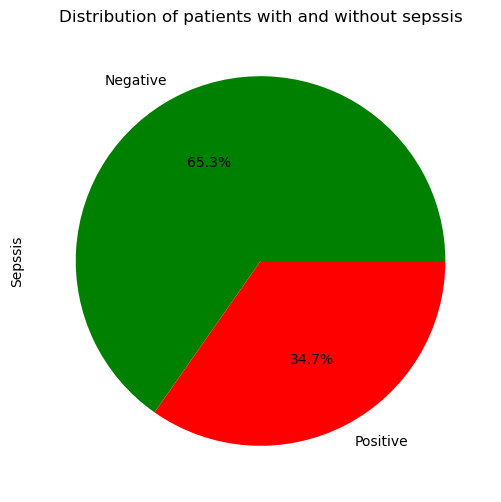

In [53]:

plt.figure(figsize=(8, 6))
train_df['Sepssis'].value_counts().plot.pie(autopct='%1.1f%%', colors='green')
plt.title('Distribution of patients with and without sepssis')
plt.show()

<b> 6. How many patients have insurance cover

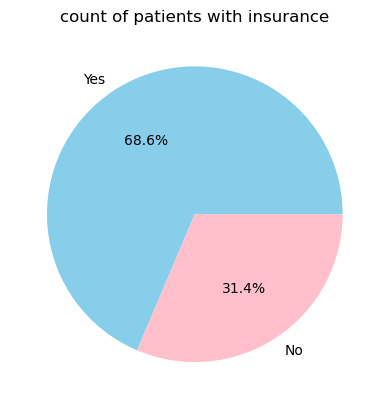

In [54]:
insurance_count = train_df['Insurance'].value_counts()
label = {1:'Yes', 0:'No'}
label_plot =insurance_count.index.map(label)

plt.pie(insurance_count, labels=label_plot, colors=('skyblue', 'pink'), autopct='%1.1f%%')
plt.title('count of patients with insurance')
plt.show()

## Hypothesis

In [7]:
# Extract the relevant variables for the hypothesis test
positive_sepssis = train_df[train_df['Sepssis'] == 'Positive' ]['M11']
nagetive_sepssis = train_df[train_df['Sepssis'] == 'Nagetive' ]['M11']

# Perform a two-sample t-test to compare sales between promotional and non-promotional periods
t_statistic, p_value = ttest_ind(positive_sepssis, nagetive_sepssis)





# Perform a two-sample t-test to compare the gbody mass of patients and likelihood of having sepssis
t_statistic, p_value = ttest_ind(positive_sepssis, nagetive_sepssis)

# Print the test result
print("Hypothesis Testing for BMI of sepssis patients:")
print("Null Hypothesis (H0): There is correlation between body mass index (BMI) and the incidence of sepsis among patients.")
print("Alternative Hypothesis (H1): There is no correlation between body mass index (BMI) and the incidence of sepsis among patientss.")
print("-" * 50)
print("Test Statistic:", t_statistic)
print("P-value:", p_value)
print("=" * 50)
if p_value < 0.01:
    print("Reject the null hypothesis. There is correlation between body mass index (BMI) and the incidence of sepsis among patients .")
else:
    print("Fail to reject the null hypothesis. There is no correlation between body mass index (BMI) and the incidence of sepsis among patients.")
  

Hypothesis Testing for BMI of sepssis patients:
Null Hypothesis (H0): There is correlation between body mass index (BMI) and the incidence of sepsis among patients.
Alternative Hypothesis (H1): There is no correlation between body mass index (BMI) and the incidence of sepsis among patientss.
--------------------------------------------------
Test Statistic: nan
P-value: nan
Fail to reject the null hypothesis. There is no correlation between body mass index (BMI) and the incidence of sepsis among patients.


In [8]:
import scipy.stats as stats

In [11]:

null_hyp = 'There is correlation between body mass index (BMI) and the incidence of sepsis among patient'
alt_hyp = 'There is no correlation between body mass index (BMI) and the incidence of sepsis among patientss'
observed_value = pd.crosstab(train_df['M11'],train_df['Sepssis'])
chi2, p_value, dof, expected_value= stats.chi2_contingency(observed_value)
print('chi2:', chi2)
print('p_value:', p_value)
print('dof:', dof)
print('expected_value:',expected_value)
alpha= 0.01
if p_value <= alpha:
    print('The null hypothesis is rejected')
    print(alt_hyp)
else:
    print('The nul hypothesis is accepted')
    print(null_hyp)

chi2: 276.8732746096437
p_value: 0.023144955185890357
dof: 232
expected_value: [[5.87479132 3.12520868]
 [1.95826377 1.04173623]
 [0.65275459 0.34724541]
 [0.65275459 0.34724541]
 [0.65275459 0.34724541]
 [0.65275459 0.34724541]
 [1.95826377 1.04173623]
 [0.65275459 0.34724541]
 [0.65275459 0.34724541]
 [1.30550918 0.69449082]
 [1.30550918 0.69449082]
 [1.30550918 0.69449082]
 [2.61101836 1.38898164]
 [0.65275459 0.34724541]
 [0.65275459 0.34724541]
 [2.61101836 1.38898164]
 [1.95826377 1.04173623]
 [1.30550918 0.69449082]
 [1.30550918 0.69449082]
 [0.65275459 0.34724541]
 [1.30550918 0.69449082]
 [1.30550918 0.69449082]
 [1.30550918 0.69449082]
 [0.65275459 0.34724541]
 [0.65275459 0.34724541]
 [1.30550918 0.69449082]
 [0.65275459 0.34724541]
 [1.95826377 1.04173623]
 [0.65275459 0.34724541]
 [1.30550918 0.69449082]
 [1.95826377 1.04173623]
 [0.65275459 0.34724541]
 [1.30550918 0.69449082]
 [1.30550918 0.69449082]
 [1.95826377 1.04173623]
 [1.95826377 1.04173623]
 [1.95826377 1.041736

In [30]:
train_df.head(50)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
5,ICU200015,5,116,74,0,0,25.6,0.201,30,1,Negative
6,ICU200016,3,78,50,32,88,31.0,0.248,26,0,Positive
7,ICU200017,10,115,0,0,0,35.3,0.134,29,1,Negative
8,ICU200018,2,197,70,45,543,30.5,0.158,53,1,Positive
9,ICU200019,8,125,96,0,0,0.0,0.232,54,1,Positive


<b> prepering data for modeling

In [18]:
# split the data into train and eveluation
X = train_df.drop(['Sepssis','ID'],axis=1)
y = train_df['Sepssis']
# split the data into x_train, X_eval, y_train, Y_eval
X_train,X_eval,y_train,y_eval = train_test_split(X,y ,test_size=0.2, random_state=42, stratify=y)

# print the columns
print('X_train:', X_train.shape)
print('X_eval:',X_eval.shape)
print('y_train:',y_train.shape)
print('y_eval:',y_eval.shape)

X_train: (479, 9)
X_eval: (120, 9)
y_train: (479,)
y_eval: (120,)


In [27]:
num_cols=X_train.describe(include='number').columns
num_cols

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')

# Pipeline

In [28]:
# creating a pipeline 
numeric_pipeline = Pipeline(steps=[
    ('num_imputer',SimpleImputer(strategy='median')),
    ('scaler ', RobustScaler()),
    ('power_transformer', PowerTransformer(method="yeo-johnson"))
])


preprocessor =ColumnTransformer([
    ('numerical_transformations',numeric_pipeline,num_cols),
   
])

In [29]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the training labels
y_train_encoded = label_encoder.fit_transform(y_train)

#using the same label_encoder instance we transfromed the test labels )
y_eval_encoded = label_encoder.transform(y_eval)

In [7]:
X_train

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
161,7,102,74,40,105,37.2,0.204,45,1
236,7,181,84,21,192,35.9,0.586,51,0
497,2,81,72,15,76,30.1,0.547,25,1
40,3,180,64,25,70,34.0,0.271,26,0
372,0,84,64,22,66,35.8,0.545,21,1
...,...,...,...,...,...,...,...,...,...
253,0,86,68,32,0,35.8,0.238,25,1
230,4,142,86,0,0,44.0,0.645,22,0
131,9,122,56,0,0,33.3,1.114,33,1
107,4,144,58,28,140,29.5,0.287,37,1


# Modelling

In [62]:
models = [
   ('tree_classifier',DecisionTreeClassifier(random_state=42)),
    ('svc_classifier',SVC(random_state=42, probability=True)),
    ('random_classifier',RandomForestClassifier(random_state=42)),
    ('knn_classifier',KNeighborsClassifier()),
    ('gradient_classifier',GradientBoostingClassifier())
   #  ('gauss_classifier',GaussianNB())
   #   ('Naives_classifier',GaussianNB())
 
]

In [63]:
result = pd.DataFrame(columns=['Model_name','Accuracy','Precision', 'Recall', 'F1_score'])
all_pipeline = {}

for model_name,classifier in models:
    pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('classifier',classifier)
        
    ])
 
    pipeline.fit(X_train,y_train_encoded)
    
    y_pred = pipeline.predict(X_eval)
    # print(f"{model_name}")

    predict_result = classification_report(y_pred,y_eval_encoded,output_dict=True)
    all_pipeline[model_name] = pipeline

    accuracy = predict_result['accuracy']
    precision= predict_result['weighted avg']['precision']
    recall= predict_result['weighted avg']['recall']
    f1_score= predict_result['weighted avg']['f1-score']

    result.loc[len(result)] = [model_name,accuracy,precision,recall,f1_score]

result

,Model_name,Accuracy,Precision,Recall,F1_score
0,tree_classifier,0.725000,0.726664,0.725000,0.725781
1,svc_classifier,0.683333,0.699267,0.683333,0.689649
2,random_classifier,0.716667,0.720391,0.716667,0.718329
3,knn_classifier,0.750000,0.750000,0.750000,0.750000
4,gradient_classifier,0.716667,0.731502,0.716667,0.722317


In [65]:
all_pipeline['knn_classifier']

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformations',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler ',
                                                                   RobustScaler()),
                                                                  ('power_transformer',
                                                                   PowerTransformer())]),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [39]:
rand_sample = RandomOverSampler()
rand_sample
X_train_resampled, y_train_resampled = rand_sample.fit_resample(X_train,y_train_encoded)
pd.DataFrame(y_train_resampled).value_counts()

0    313
1    313
dtype: int64

In [40]:

balanced_result = pd.DataFrame(columns=['Model_name','Accuracy','Precision', 'Recall', 'F1_score'])

for model_name,classifier in models:
    pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),

        ('classifier',classifier),
        
    ])
    

 
    pipeline.fit(X_train_resampled,y_train_resampled)
    
    y_pred_resample = pipeline.predict(X_eval)
    # print(f"{model_name}")

    predict_result = classification_report(y_pred_resample,y_eval_encoded,output_dict=True)
   

    accuracy = predict_result['accuracy']
    precision= predict_result['weighted avg']['precision']
    recall= predict_result['weighted avg']['recall']
    f1_score= predict_result['weighted avg']['f1-score']

    balanced_result.loc[len(balanced_result)] = [model_name,accuracy,precision,recall,f1_score]

balanced_result

,Model_name,Accuracy,Precision,Recall,F1_score
0,tree_classifier,0.666667,0.661783,0.666667,0.663477
1,svc_classifier,0.691667,0.688782,0.691667,0.686186
2,random_classifier,0.700000,0.695849,0.700000,0.697129
3,knn_classifier,0.683333,0.694567,0.683333,0.676095
4,gradient_classifier,0.700000,0.697314,0.700000,0.698460


In [41]:

# selecting the K- best
selection = SelectKBest(mutual_info_classif, k=all)

smote_data = pd.DataFrame(columns=['Model_name','Accuracy','Precision', 'Recall', 'F1_score'])
all_pipeline = {}

for model_name,classifier in models:
    pipeline=imbpipeline(steps=[
        ('preprocessor',preprocessor),
        ('smote',SMOTE(random_state=42)),
         ('feature_selection', SelectKBest(score_func=mutual_info_classif, k='all')),
        ('classifier',classifier),
        
    ])
 
    pipeline.fit(X_train_resampled,y_train_resampled)
    
    smote_y_pred = pipeline.predict(X_eval)


    smote_result = classification_report(y_eval_encoded, smote_y_pred, output_dict=True)

    accuracy = smote_result['accuracy']
    precision= smote_result['weighted avg']['precision']
    recall= smote_result['weighted avg']['recall']
    f1_score= smote_result['weighted avg']['f1-score']

    smote_data.loc[len(smote_data)] = [model_name,accuracy,precision,recall,f1_score]


smote_data

,Model_name,Accuracy,Precision,Recall,F1_score
0,tree_classifier,0.666667,0.674501,0.666667,0.669856
1,svc_classifier,0.691667,0.710273,0.691667,0.697147
2,random_classifier,0.700000,0.707286,0.700000,0.702871
3,knn_classifier,0.683333,0.721746,0.683333,0.690571
4,gradient_classifier,0.708333,0.713556,0.708333,0.710503


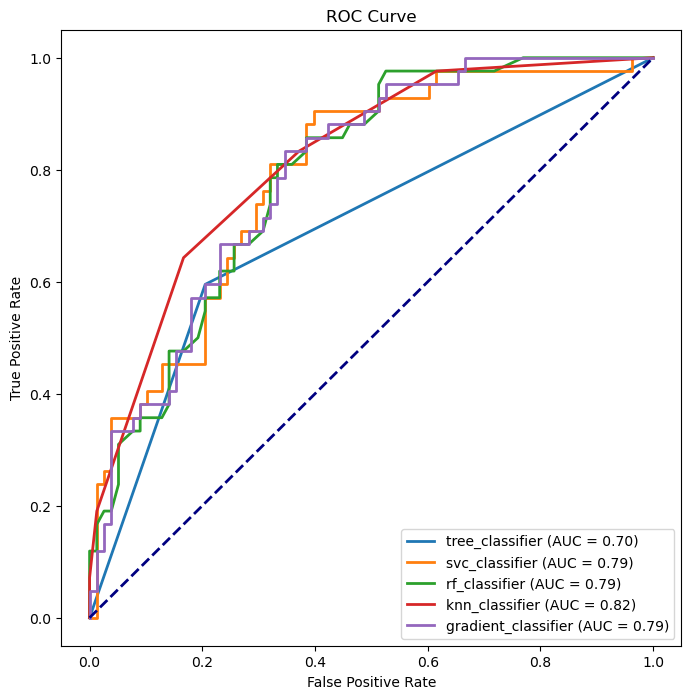

In [96]:
roc_curve_dict = {}  
fig, ax = plt.subplots(figsize=(8, 8))
for model_name,classifier in models:
    pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('classifier',classifier),
        
    ])

    pipeline.fit(X_train,y_train)

    y_score = pipeline.predict_proba(X_eval)[:, 1]

    fpr, tpr, threshold = roc_curve(y_eval_encoded, y_score)
    roc_auc = auc(fpr, tpr)
    roc_curve_df = pd.DataFrame({'False positive rate': fpr, 'True positive rate': tpr, 'Threshold': threshold})

    roc_curve_dict[model_name] = roc_curve_df

    ax.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plotting ROC Curve
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Hyperparameter

In [67]:
hyper_result = pd.DataFrame(columns=['Model_name','Accuracy','Precision', 'Recall', 'F1_score'])
all_pipeline = {}
param_grids={
    'random_classifier':{
        'classifier_n_estimators':[50,100,200],
        'classifier_max_depth':[None,10,20]
    },
    'gradient_classifier':{
      'classifier_n_estimators':[50,100,200],
      'classifie_learning_rate':[0.01,0.1,0.2],
     }
#    'knn_classifier':{
#        'n_neighbors':[1,2,5],
#        'algorithm':['auto']
#    }
}

for model_name, Pipeline in all_pipeline.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(Pipeline, param_grid=param_grid, cv=5, scoring='f1_weighted')
    grid_search.fit(X_train,y_train_encoded)

    best_pipeline = grid_search.best_estimator_
    all_pipeline[model_name] = best_pipeline

    y_pred = best_pipeline.predict(X_eval)
    paramater_result = classification_report(y_eval_encoded, y_pred, output_dict=True)

    accuracy = paramater_result['accuracy']
    precision= paramater_result['weighted avg']['precision']
    recall= paramater_result['weighted avg']['recall']
    f1_score= paramater_result['weighted avg']['f1-score']

    hyper_result .loc[len(hyper_result)] = [model_name,accuracy,precision,recall,f1_score]


hyper_result 


,Model_name,Accuracy,Precision,Recall,F1_score


In [ ]:


# # Define the preprocessor, assuming you have it defined somewhere
# preprocessor = ... 

# # Define the imbalanced pipeline with SMOTE
# random_forest_pipeline = ImbPipeline([
#     ('preprocessor', preprocessor),
#     ('smote', SMOTE(random_state=42)),
#     ('feature_selection', SelectKBest(score_func=mutual_info_classif, k='all')),  # Change k=42 to k='all'
#     ('classifier', RandomForestClassifier())
# ])

# # Fit the pipeline to your data
# # random_forest_pipeline.fit(X_train_resampled, y_train_resampled)

# # Define the parameter grid for GridSearchCV
# params_grid = {
#     'feature_selection__k': [20, 30, 40],  
#     'classifier__n_estimators': [20, 30, 10],
#     'classifier__max_depth': [None, 10, 20],
#     'classifier__min_samples_split': [2, 5, 10],
# }

# # Initialize GridSearchCV
# searcher = GridSearchCV(
#     random_forest_pipeline, 
#     param_grid=params_grid, 
#     cv=5, 
#     scoring='f1'
# )
    
# # Fit the searcher with train data
# searcher.fit(X_train, y_train_encoded)


In [ ]:


# # Define the imbalanced pipeline with SMOTE
# gradient_pipeline = ImbPipeline([
#     ('preprocessor', preprocessor),
#     ('smote', SMOTE(random_state=42)),
#     ('feature_selection', SelectKBest(score_func=mutual_info_classif)),
#     ('gradient_boost', GradientBoostingClassifier())
# ])

# # Define the parameter grid for GridSearchCV
# params_grid = {
#     'gradient_boost__n_estimators': [20, 30, 40],
#     'gradient_boost__max_depth': [None, 10, 20],
#     'gradient_boost__min_samples_split': [2, 5, 10],
# }

# # Initialize GridSearchCV with RandomForestClassifier as the estimator
# grid_search = GridSearchCV(estimator=gradient_pipeline, param_grid=params_grid, scoring='f1', n_jobs=-1, verbose=2)

# # Fit the searcher with train data
# grid_search.fit(X_train, y_train_encoded)


In [68]:
# Create a pipeline with preprocessor and RandomForestClassifier 
svc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svc_classifier',SVC(random_state=42, probability=True))])
 # Fit the pipeline to the training data 
svc_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformations',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler ',
                                                                   RobustScaler()),
                                                                  ('power_transformer',
                                                                   PowerTransformer())]),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('svc_classifier', SVC(probability=True, random_state=42))])

In [69]:
# Create a pipeline with preprocessor and RandomForestClassifier 
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42)) ])
 # Fit the pipeline to the training data 
random_forest_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformations',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler ',
                                                                   RobustScaler()),
                                                                  ('power_transformer',
                                                                   PowerTransformer())]),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [70]:
# Create a pipeline with preprocessor and RandomForestClassifier 
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn_classifier',KNeighborsClassifier())])
 # Fit the pipeline to the training data 
knn_pipeline .fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_transformations',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler ',
                                                                   RobustScaler()),
                                                                  ('power_transformer',
                                                                   PowerTransformer())]),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('knn_classifier', KNeighborsClassifier())])

In [71]:

# Create the directory if it doesn't exist
os.makedirs("./models/", exist_ok=True)

# Save the pipeline and encoder

joblib.dump(svc_pipeline ,'./models/svc_pipeline .joblib')
joblib.dump(random_forest_pipeline,'./models/random_forest_pipeline.joblib')
joblib.dump(knn_pipeline,'./models/knn_pipeline.joblib')
joblib.dump(label_encoder, './models/label_encoder.joblib')

['./models/label_encoder.joblib']